In [6]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

# https://datascienceplus.com/principal-component-analysis-pca-with-python/

In [2]:

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

In [7]:
# Fit to data and predict using pipelined scaling, GNB and PCA
number_components = 2
std_clf = make_pipeline(StandardScaler(), PCA(n_components=number_components), RandomForestClassifier(random_state=0))
std_clf.fit(X_train, y_train)


In [9]:
std_clf.named_steps

{'standardscaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'randomforestclassifier': RandomForestClassifier(random_state=0)}

In [11]:
forest = std_clf.named_steps['randomforestclassifier']
result = permutation_importance(
    std_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [18]:
result_df = pd.DataFrame(std_clf.predict(X_test),columns=['predicted'])
result_df['actual'] = y_test
result_df

,predicted,actual
0,0,0
1,0,0
2,2,2
3,0,0
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,2,2


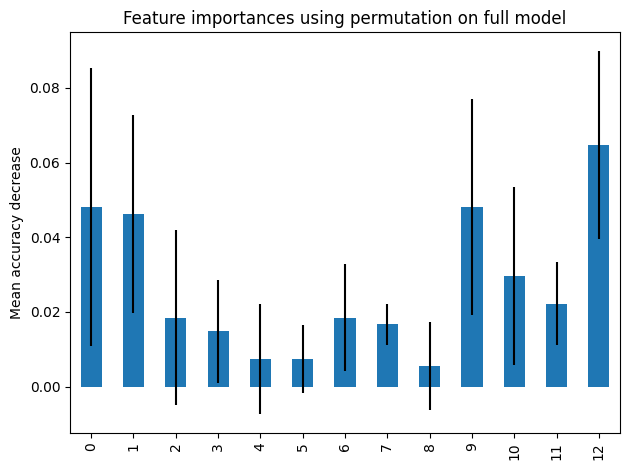

In [12]:
forest_importances = pd.Series(result.importances_mean)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()